# Ham or Spam - Real or Fake message detection

## Install the required libraries

In [1]:
# !pip install wordcloud


## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## EDAs - Exploratory Data Analysis

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Remove the unwanted columns

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.columns = ['Class', 'Text']

In [12]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Visualization

<Axes: xlabel='Class', ylabel='count'>

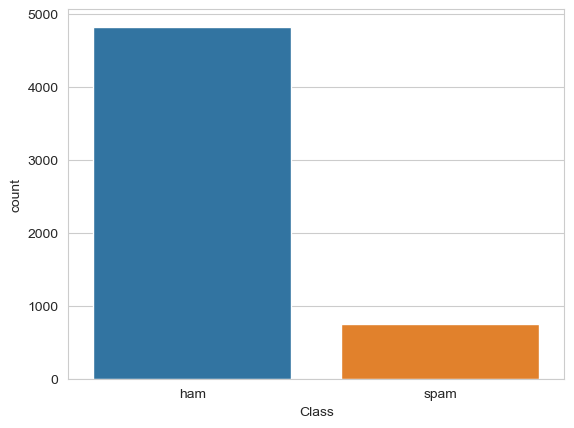

In [13]:
sns.countplot(x=df['Class'])

In [14]:
df.shape

(5572, 2)

In [15]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

## Data Converting - Categorical to Numerical

In [16]:
d = {'ham': 0, 'spam': 1}
df['Class'] = df['Class'].map(d)
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Important Concepts of NLP projects
* Change everything to lowercase
* remove punctuations
* remove numbers
* remove stopwords
* remove whitespaces
* remove newlines
* tokenize the words
* lema and stem the words (compare the results)
* vectorize the words

In [17]:
# Remove the unwanted characters
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]', '')
df['Text'] = df['Text'].str.replace('\n', '')
df['Text'] = df['Text'].str.replace('\d+', '')
df['Text'] = df['Text'].str.replace('\r', ' ')
df.head()

,Class,Text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [18]:
# Remove the stopwords
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df.head()

df.text = df.Text.str.replace('.', '')
df.text = df.Text.str.replace(',', '')
df.text = df.Text.str.replace('\'', '')
df.text = df.Text.str.replace('\'', '')
df.text = df.Text.str.replace("'", '')
df.text = df.Text.str.replace("!", '')
df.text = df.Text.str.replace("\r", ' ')

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
## Show the wordcloud
def show_wordcloud(data, title = None, background_color = 'white'):
    wordcloud = WordCloud(
        background_color = background_color,
        # max_words = 200,
        # max_font_size = 40, 
        # scale = 3,
        # random_state = 42, 
        stopwords = STOPWORDS,
        mask=np.array(Image.open('mask.png'))
    ).generate(' '.join(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    

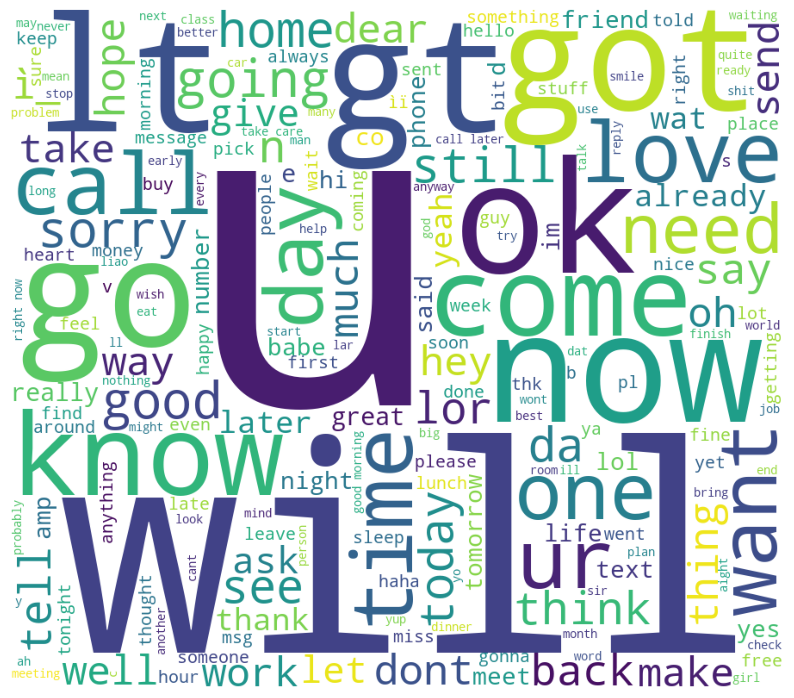

In [21]:
ham = df[df['Class'] == 0]['Text']
show_wordcloud(ham)

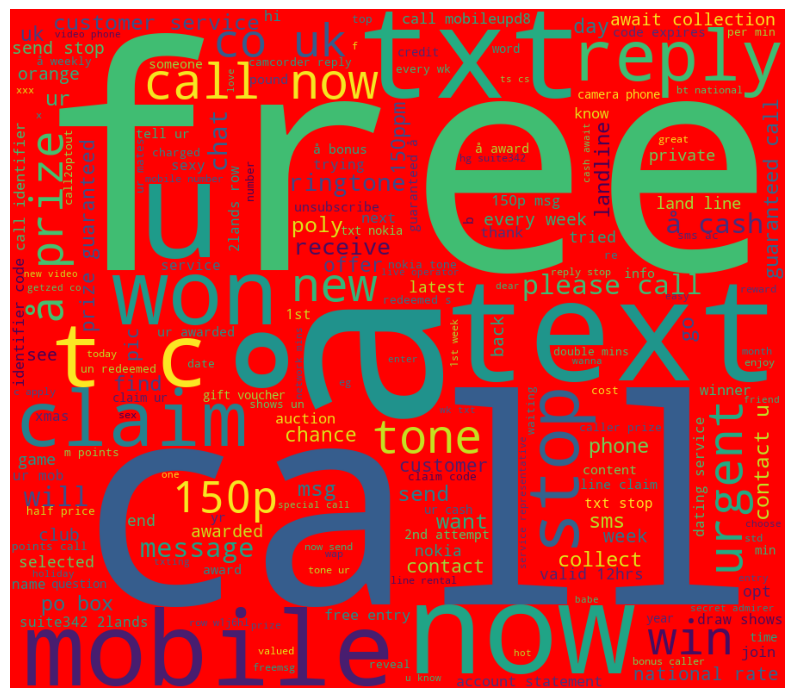

In [22]:
spam = df[df['Class'] == 1]['Text']
show_wordcloud(spam, background_color='red')

## Model Building

In [23]:
x = df['Text']
y = df['Class']


In [24]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [26]:
from textblob import TextBlob
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [27]:
vect = CountVectorizer(ngram_range=(1, 2), analyzer=lemmafn)

x = vect.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
nb = MultinomialNB()
model = nb.fit(x_train, y_train)


In [30]:
pred = model.predict(x_test)


In [31]:
accuracy_score(pred, y_test)

0.97847533632287